In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/interpreted_seismics_2/horizontes/teste_3/"
nome_modelo = "BES-Seismics-Surfaces-Luis_Teste-3"
geo_model = gp.create_model(nome_modelo)

No module named 'osgeo'


### Detalhes dos dados
- Contém as horizontes geradas pelo Petrel a partir de interpretação sismica. Nesse tem o maastrichtiano, turoniano e cenomaniano.
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000). De 386mil pontos para 1363. Quanto mais ponto, mais memoria usa.
- Cada surfaces (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[430853.235, 474018.154, 7782491.414, 7798430.28, -6544.67, -2566.97],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_1000m.csv",
    #path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


BES-Seismics-Surfaces-Luis_Teste-3  2024-03-26 12:30

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Default series,1,#015482,1
1,TURONIANO,Default series,2,#9f0052,2
2,CENOMANIANO,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("MAASTRICHTIANO",),
        "Strat_Series_2": ("TURANIANO",),
        "Strat_Series_3": ("CENOMANIANO",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
1,TURONIANO,Default series,1,#9f0052,1
0,MAASTRICHTIANO,Strat_Series_1,1,#015482,2
2,CENOMANIANO,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,False,False,False
Strat_Series_1,2,Erosion,False,False,False
Strat_Series_3,3,Erosion,False,False,False
Basement_series,4,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth      surface  G_x   
surface_points 616   444066.31  7.80e+06 -4469.07  2.00e-06    TURONIANO  NaN  \
               617   445003.85  7.80e+06 -4645.88  2.00e-06    TURONIANO  NaN   
               618   446003.89  7.80e+06 -4490.98  2.00e-06    TURONIANO  NaN   
               619   447003.94  7.80e+06 -4518.93  2.00e-06    TURONIANO  NaN   
               620   448003.98  7.80e+06 -4594.58  2.00e-06    TURONIANO  NaN   
...                        ...       ...      ...       ...          ...  ...   
               1357  470005.47  7.79e+06 -5742.88  2.00e-06  CENOMANIANO  NaN   
               1358  471005.52  7.79e+06 -5879.33  2.00e-06  CENOMANIANO  NaN   
               1359  472005.56  7.79e+06 -5994.45  2.00e-06  CENOMANIANO  NaN   
               1360  473005.61  7.79e+06 -6065.91  2.00e-06  CENOMANIANO  NaN   
               1361  474005.65  7.79e+06 -6137.75  2.00e-06  CENOMANIANO  NaN   

                     G_y  G_z  
surface_points 616   NaN  NaN  
               617   NaN  NaN  
               618   NaN  NaN  
               619   NaN  NaN  
               620   NaN  NaN  
...                  ...  ...  
               1357  NaN  NaN  
               1358  NaN  NaN  
               1359  NaN  NaN  
               1360  NaN  NaN  
               1361  NaN  NaN  

[1362 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [9]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [10]:
geo_model.get_data()

X         Y        Z    smooth      surface   G_x   
surface_points 616  444066.31  7.80e+06 -4469.07  2.00e-06    TURONIANO   NaN  \
               617  445003.85  7.80e+06 -4645.88  2.00e-06    TURONIANO   NaN   
               618  446003.89  7.80e+06 -4490.98  2.00e-06    TURONIANO   NaN   
               619  447003.94  7.80e+06 -4518.93  2.00e-06    TURONIANO   NaN   
               620  448003.98  7.80e+06 -4594.58  2.00e-06    TURONIANO   NaN   
...                       ...       ...      ...       ...          ...   ...   
orientations   490  470005.47  7.79e+06 -5742.88  1.00e-02  CENOMANIANO  0.10   
               491  471005.52  7.79e+06 -5879.33  1.00e-02  CENOMANIANO  0.09   
               492  472005.56  7.79e+06 -5994.45  1.00e-02  CENOMANIANO  0.08   
               493  473005.61  7.79e+06 -6065.91  1.00e-02  CENOMANIANO  0.06   
               494  474005.65  7.79e+06 -6137.75  1.00e-02  CENOMANIANO  0.07   

                         G_y   G_z  
surface_points 616       NaN   NaN  
               617       NaN   NaN  
               618       NaN   NaN  
               619       NaN   NaN  
               620       NaN   NaN  
...                      ...   ...  
orientations   490  6.17e-02  0.99  
               491  3.21e-02  1.00  
               492  1.48e-02  1.00  
               493 -2.52e-03  1.00  
               494 -3.46e-03  1.00  

[2724 rows x 8 columns]

In [10]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
1111,444066.31,7.80e+06,-4469.07,0.40,0.56,0.50,1.97e-02,5.42e-02,1.00,3.31,20.01,1.0,TURONIANO,Default series,1.0,1.0,0.01
1112,445003.85,7.80e+06,-4645.88,0.41,0.56,0.50,4.62e-03,4.86e-02,1.00,2.80,5.43,1.0,TURONIANO,Default series,1.0,1.0,0.01
1113,446003.89,7.80e+06,-4490.98,0.43,0.56,0.50,1.46e-02,5.55e-02,1.00,3.29,14.71,1.0,TURONIANO,Default series,1.0,1.0,0.01
1114,447003.94,7.80e+06,-4518.93,0.44,0.56,0.50,1.11e-02,5.58e-02,1.00,3.26,11.22,1.0,TURONIANO,Default series,1.0,1.0,0.01
1115,448003.98,7.80e+06,-4594.58,0.45,0.56,0.50,4.31e-02,4.49e-02,1.00,3.57,43.77,1.0,TURONIANO,Default series,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,470005.47,7.79e+06,-5742.88,0.70,0.45,0.49,9.66e-02,6.17e-02,0.99,6.58,57.43,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
491,471005.52,7.79e+06,-5879.33,0.72,0.45,0.48,9.18e-02,3.21e-02,1.00,5.58,70.73,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
492,472005.56,7.79e+06,-5994.45,0.73,0.45,0.48,8.30e-02,1.48e-02,1.00,4.83,79.92,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
493,473005.61,7.79e+06,-6065.91,0.74,0.45,0.48,6.45e-02,-2.52e-03,1.00,3.70,92.23,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


In [11]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
1111,444066.31,7.80e+06,-4469.07,0.40,0.56,0.50,1.97e-02,5.42e-02,1.00,3.31,20.01,1.0,TURONIANO,Default series,1.0,1.0,0.01
1112,445003.85,7.80e+06,-4645.88,0.41,0.56,0.50,4.62e-03,4.86e-02,1.00,2.80,5.43,1.0,TURONIANO,Default series,1.0,1.0,0.01
1113,446003.89,7.80e+06,-4490.98,0.43,0.56,0.50,1.46e-02,5.55e-02,1.00,3.29,14.71,1.0,TURONIANO,Default series,1.0,1.0,0.01
1114,447003.94,7.80e+06,-4518.93,0.44,0.56,0.50,1.11e-02,5.58e-02,1.00,3.26,11.22,1.0,TURONIANO,Default series,1.0,1.0,0.01
1115,448003.98,7.80e+06,-4594.58,0.45,0.56,0.50,4.31e-02,4.49e-02,1.00,3.57,43.77,1.0,TURONIANO,Default series,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,470005.47,7.79e+06,-5742.88,0.70,0.45,0.49,9.66e-02,6.17e-02,0.99,6.58,57.43,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
491,471005.52,7.79e+06,-5879.33,0.72,0.45,0.48,9.18e-02,3.21e-02,1.00,5.58,70.73,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
492,472005.56,7.79e+06,-5994.45,0.73,0.45,0.48,8.30e-02,1.48e-02,1.00,4.83,79.92,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
493,473005.61,7.79e+06,-6065.91,0.74,0.45,0.48,6.45e-02,-2.52e-03,1.00,3.70,92.23,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


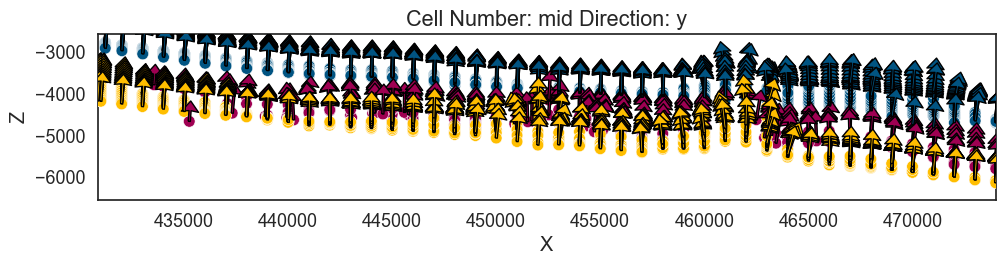

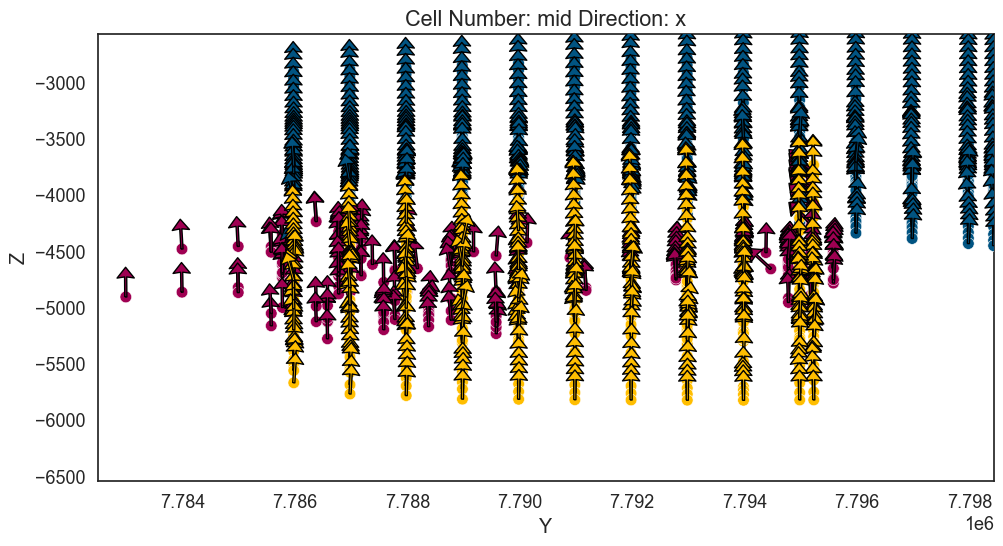

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [12]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                46185.28
$C_o$             50787613.78
drift equations  [3, 3, 3, 3]
CPU times: total: 18.5 s
Wall time: 19.3 s


In [13]:
geo_model.update_to_interpolator()

True

In [14]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 7min 19s
Wall time: 1min 22s



Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

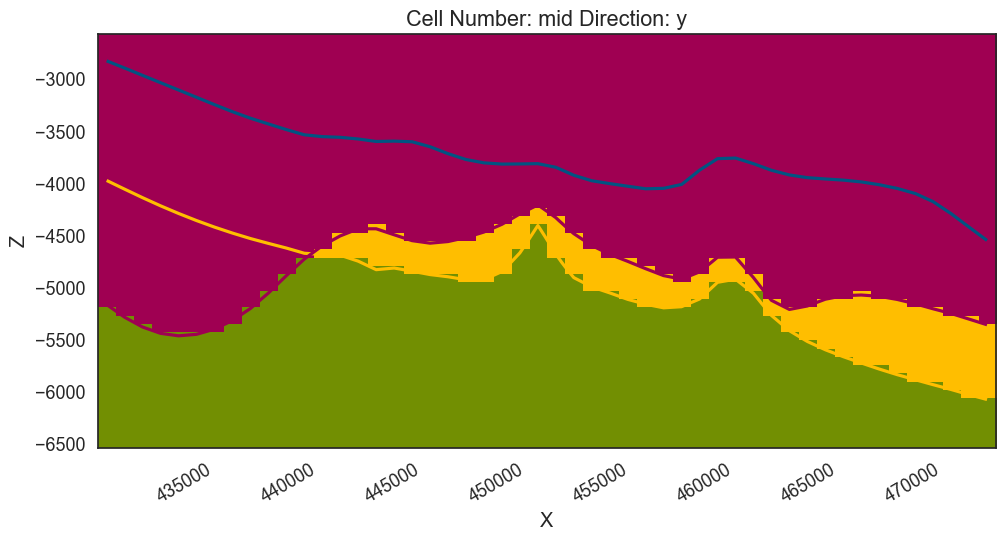

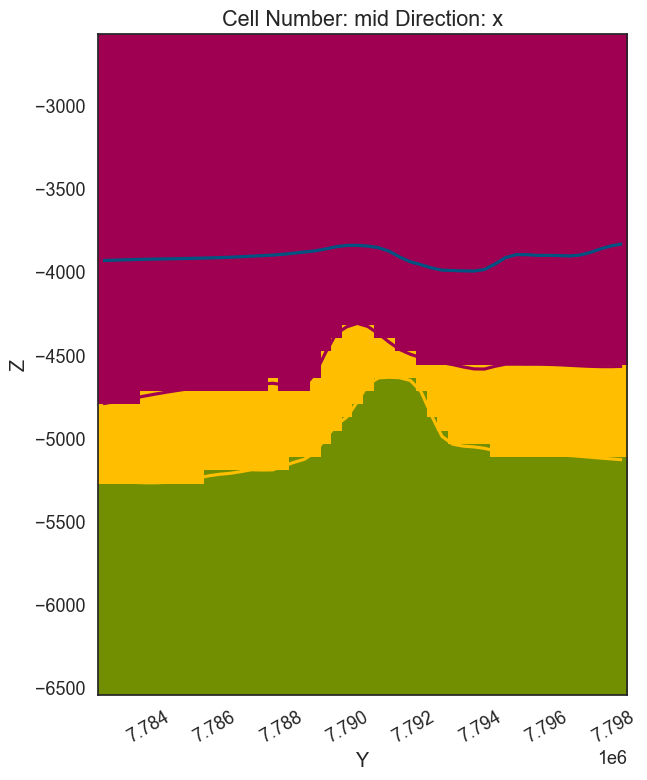

In [15]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [16]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [19]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

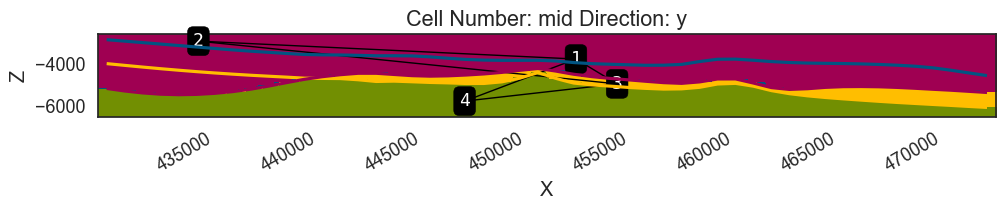

In [20]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [20]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [21]:
import pickle
save_path = "../../../../../output/BES/interpreted_seismics_2/horizontes/teste_3/"
with open(save_path + nome_modelo, "wb") as f:
    pickle.dump(geo_model, f)